In [19]:
%pip install ucimlrepo

In [20]:
from ucimlrepo import fetch_ucirepo

# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

y['Diagnosis'][y['Diagnosis'] == 'B'] = 0 # B: Benign (not cancerous)
y['Diagnosis'][y['Diagnosis'] == 'M'] = 1 # M: Malignant (cancerous)
diagnosis_count = y['Diagnosis'].value_counts()
print(diagnosis_count)

Diagnosis
0    357
1    212
Name: count, dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_11108\3846056570.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Diagnosis'][y['Diagnosis'] == 'B'] = 0 # B: Benign (not cancerous)
C:\Users\PC\AppData\Local\Temp\ipykernel_11108\3846056570.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Diagnosis'][y['Diagnosis'] == 'M'] = 1 # M: Malignant (cancerous)


In [21]:
def range_columns(df):
    """
    Function should return the description of dataframe
    """
    description = df.describe()
    return description

In [22]:
description = range_columns(X)
description.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

def draw_boxplot(df):
    """
    Function should return a box plot for each column in df
    """

    # Iterate over each column in the dataframe
    for col in df.columns:
        # Set the size of the plot
        plt.figure(figsize=(8,6))

        # Draw the box plot for the current feature
        sns.boxplot(x=df[col])

        # Set the title of the plot as the current feature name
        plt.title("Box plot for {}".format(str(col)))

        # Show the plot
        plt.show()


30


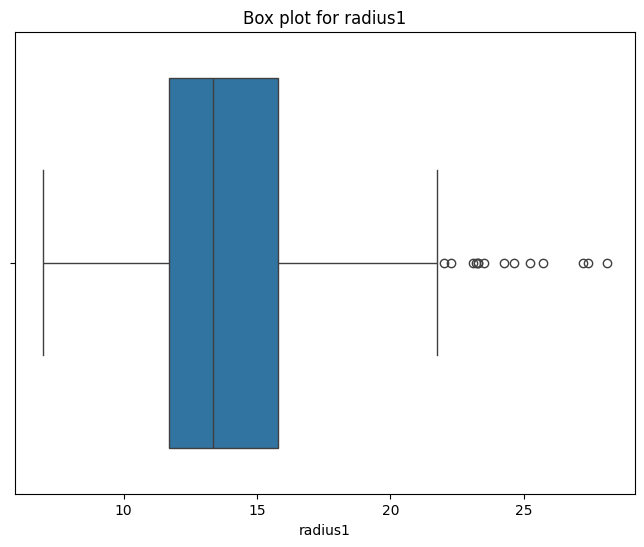

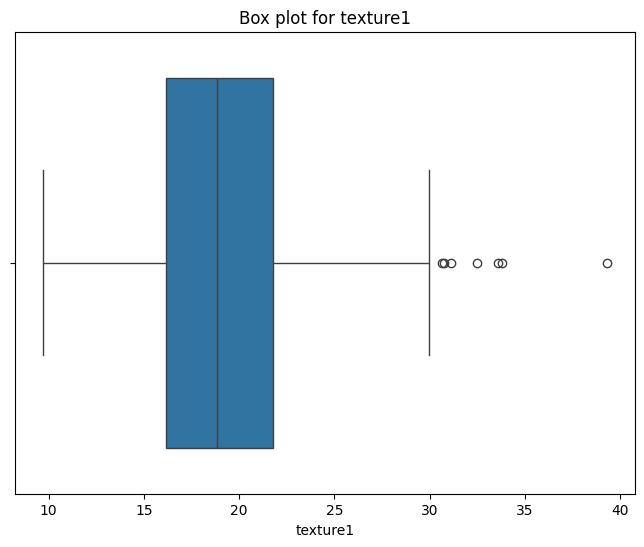

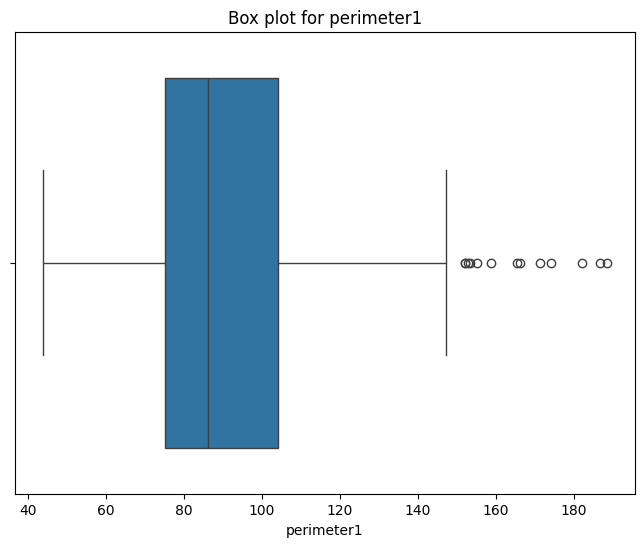

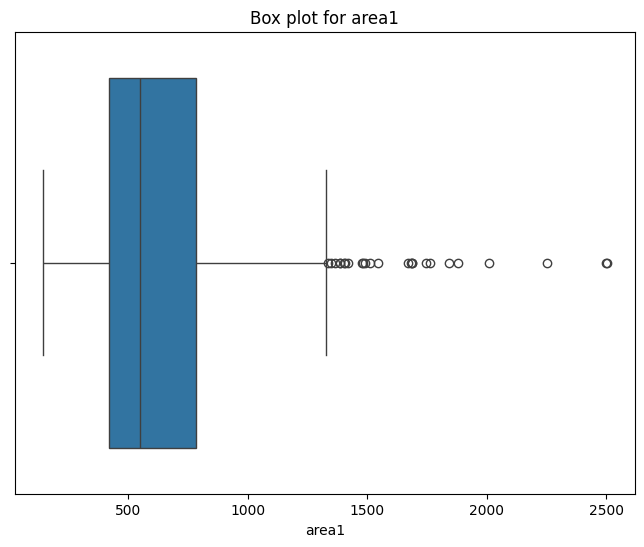

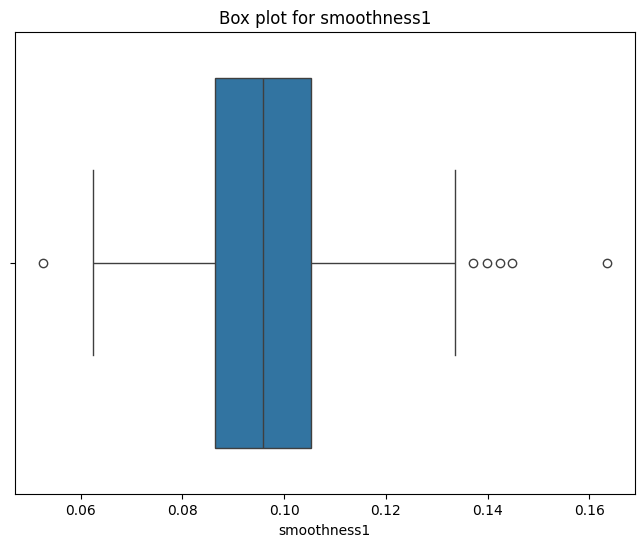

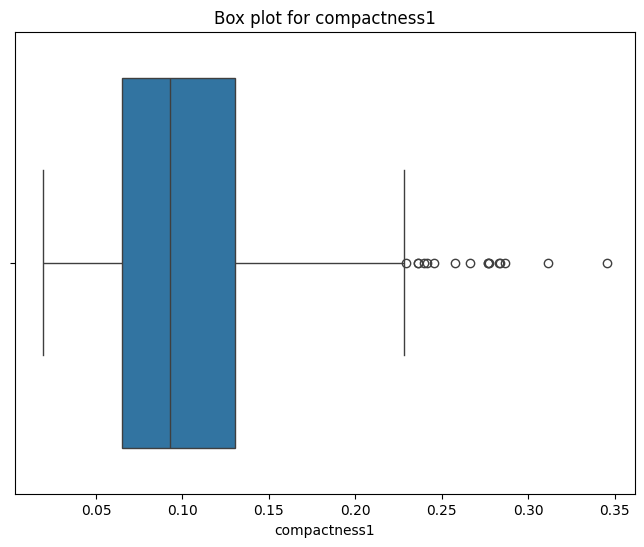

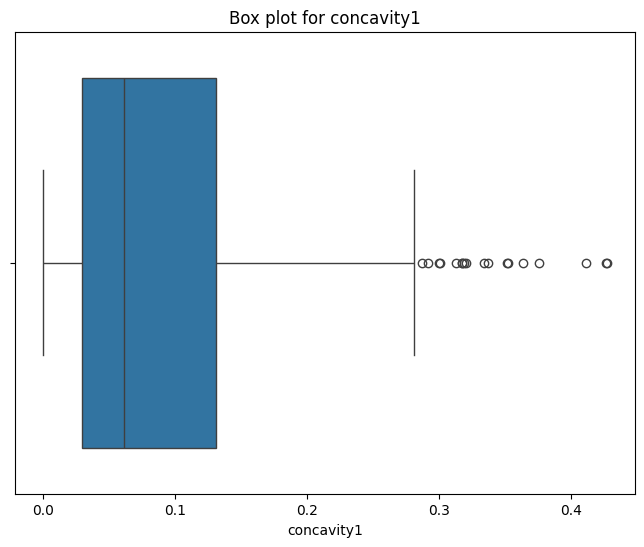

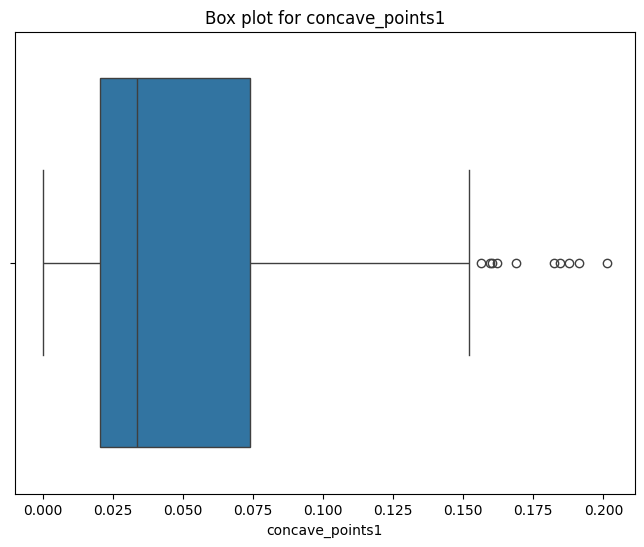

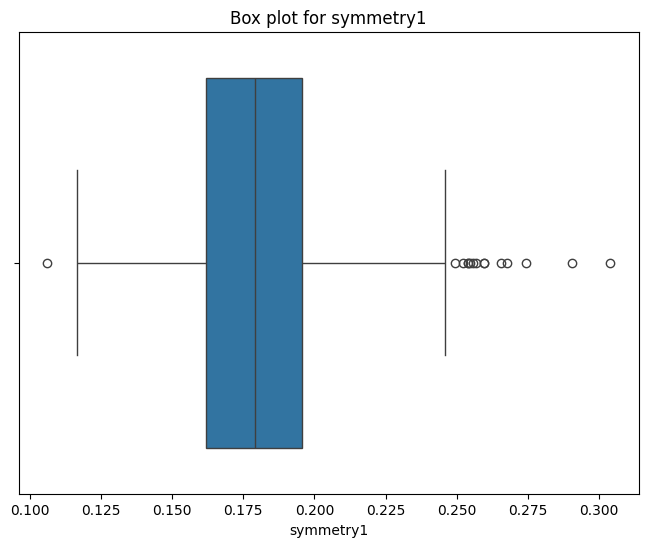

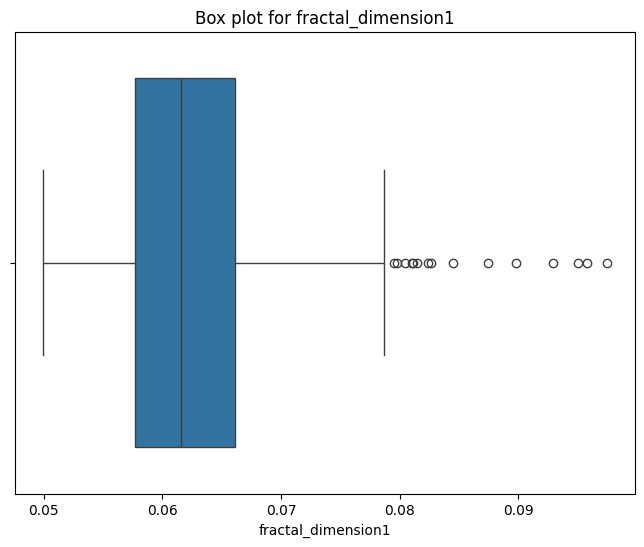

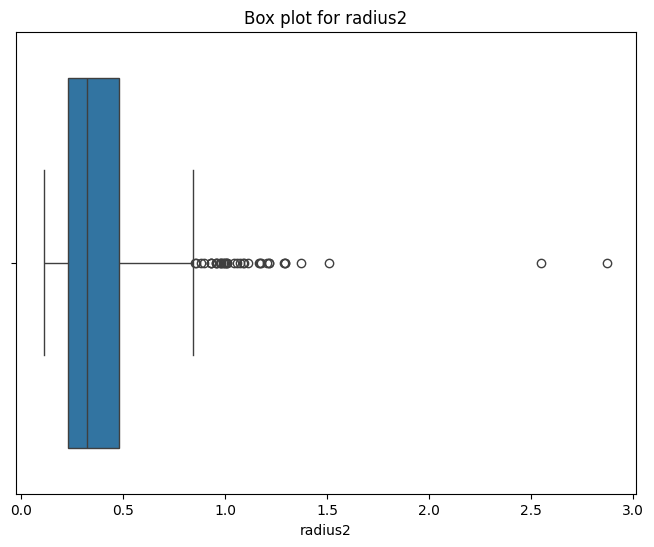

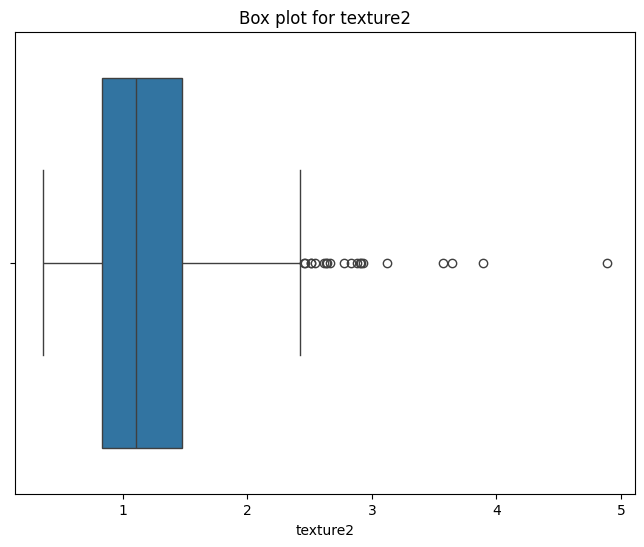

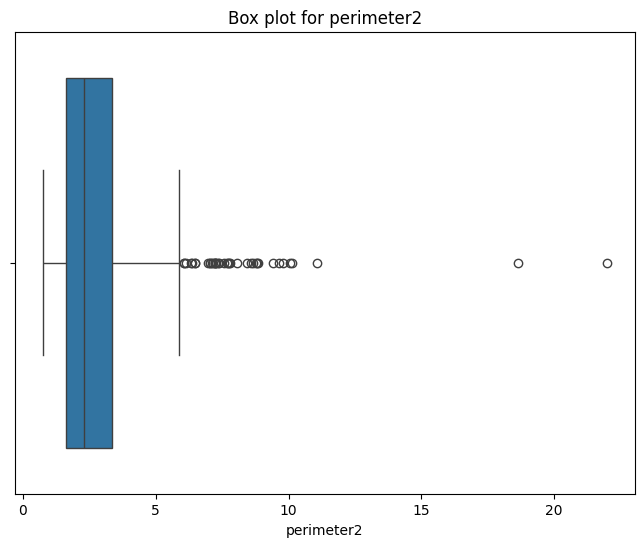

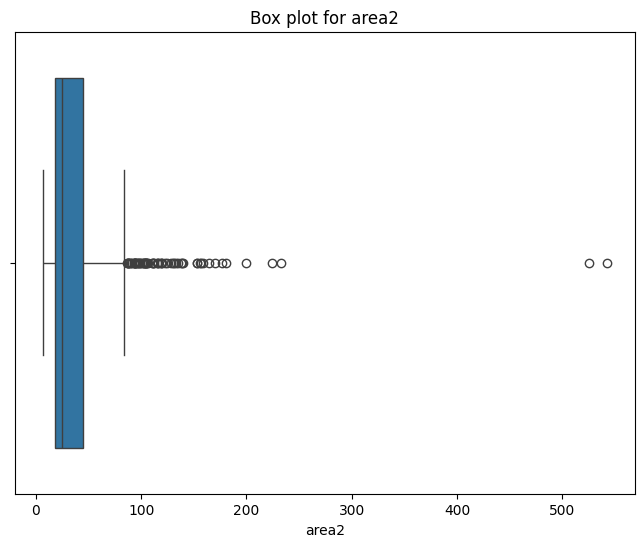

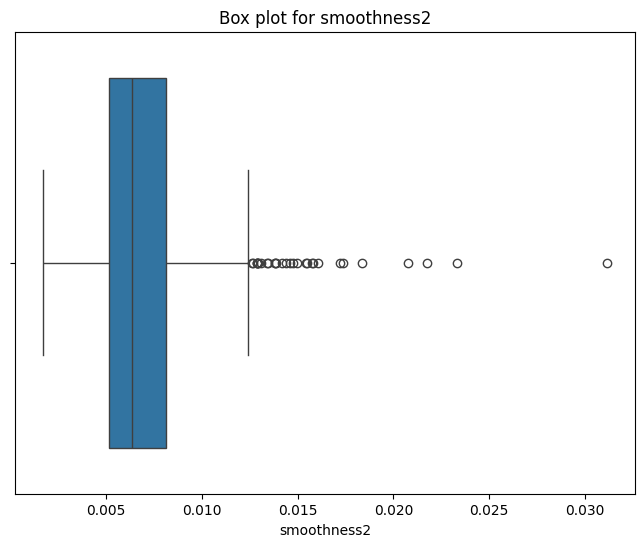

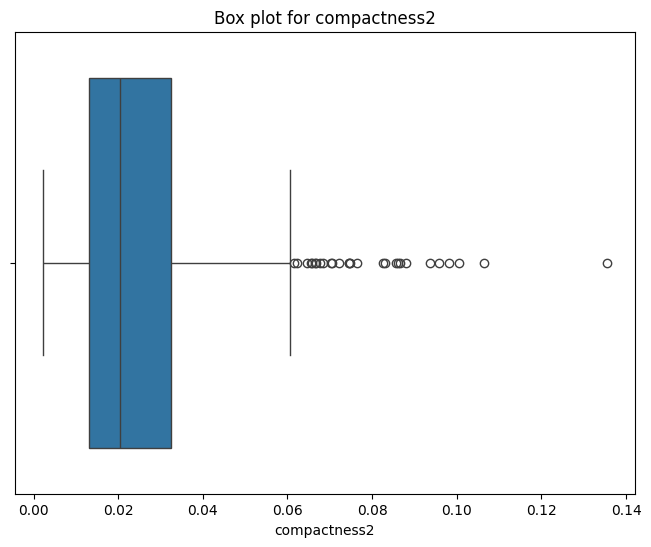

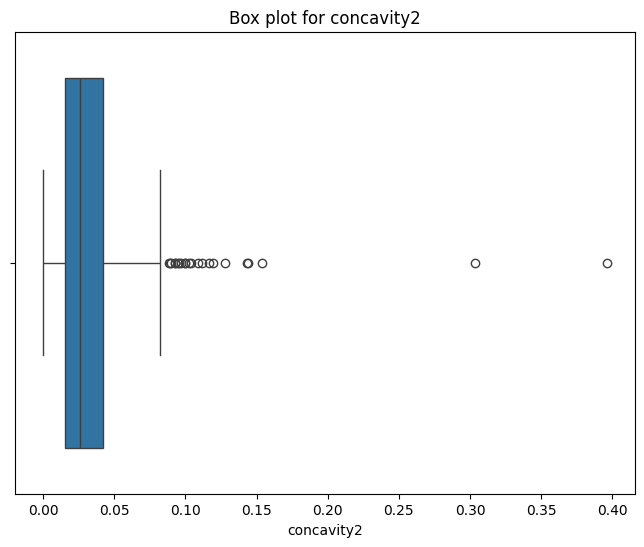

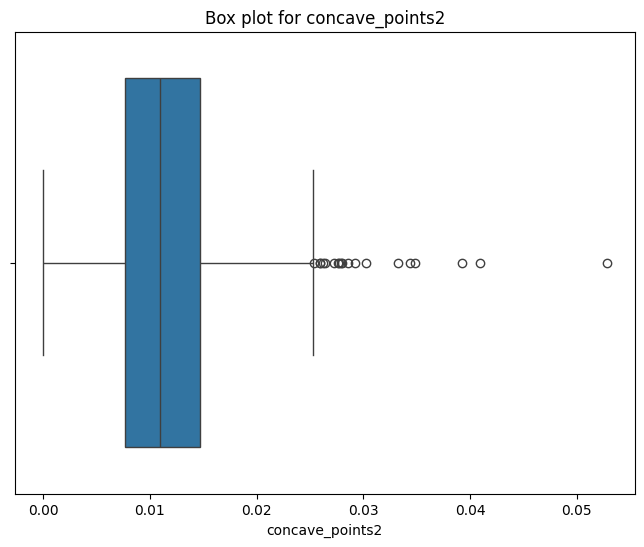

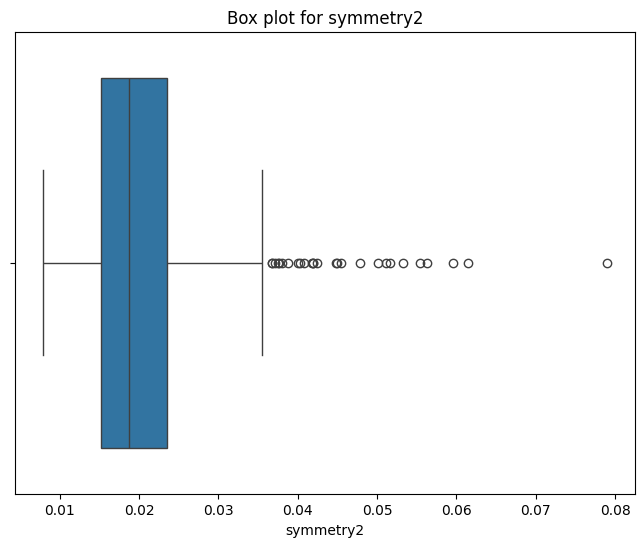

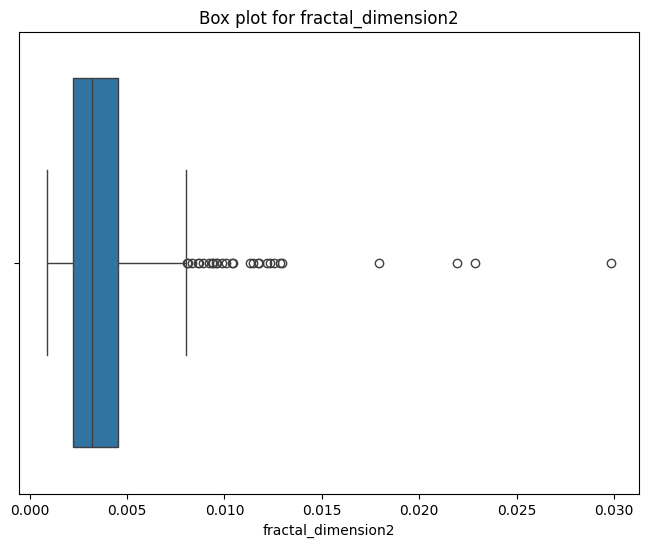

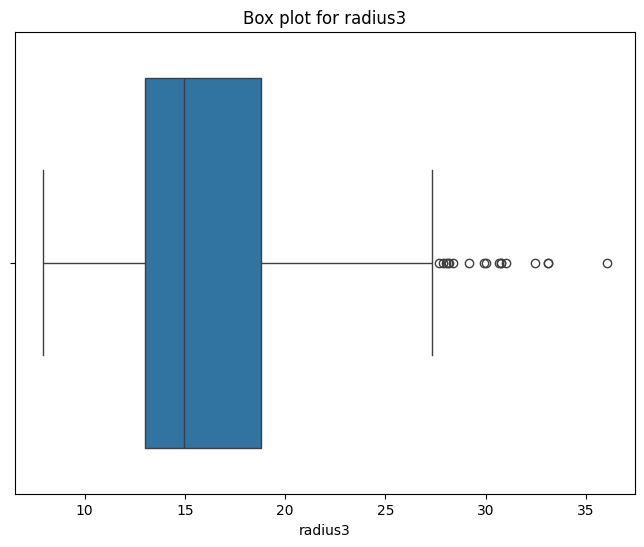

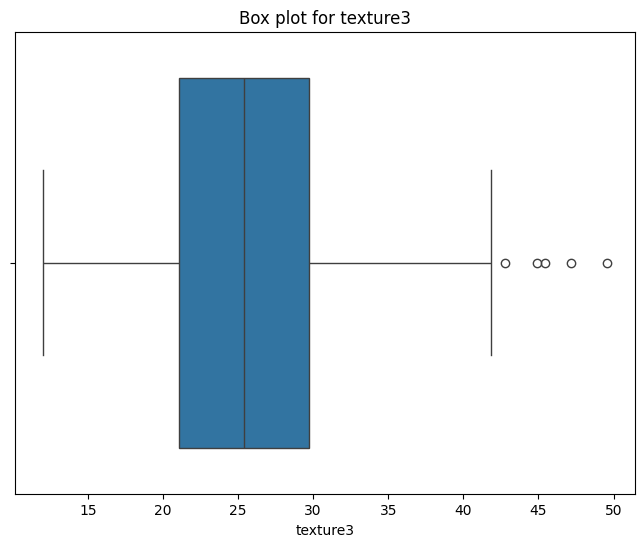

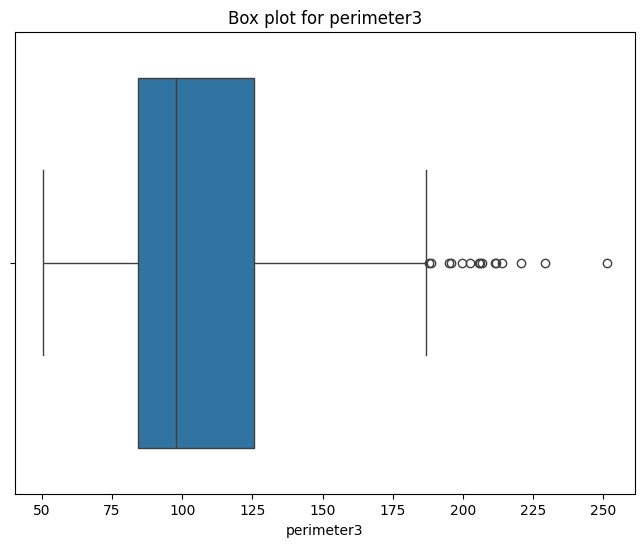

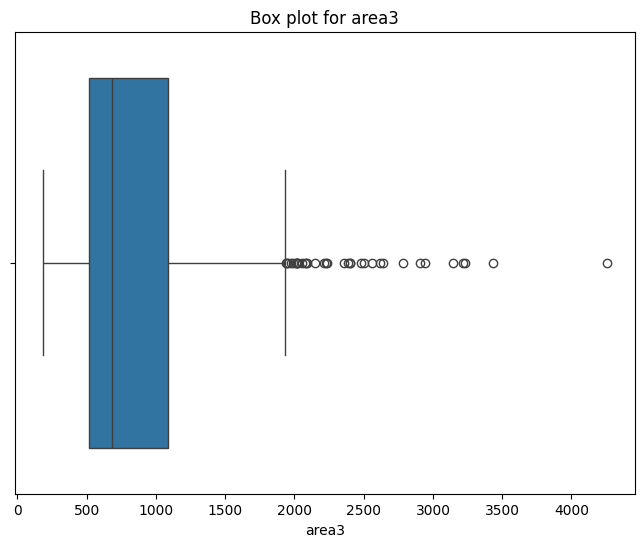

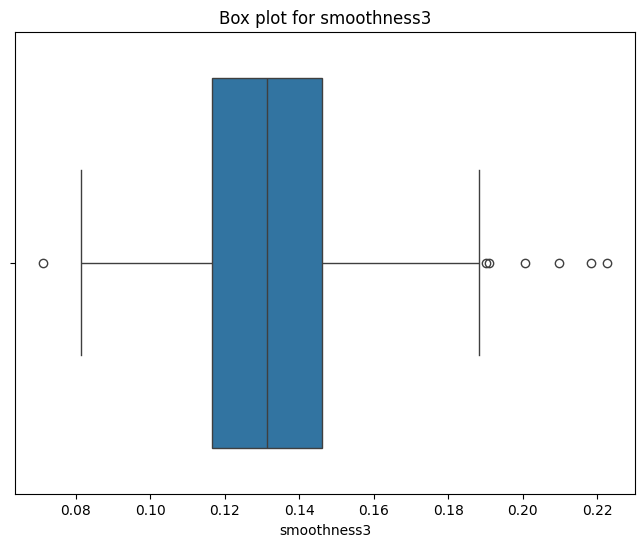

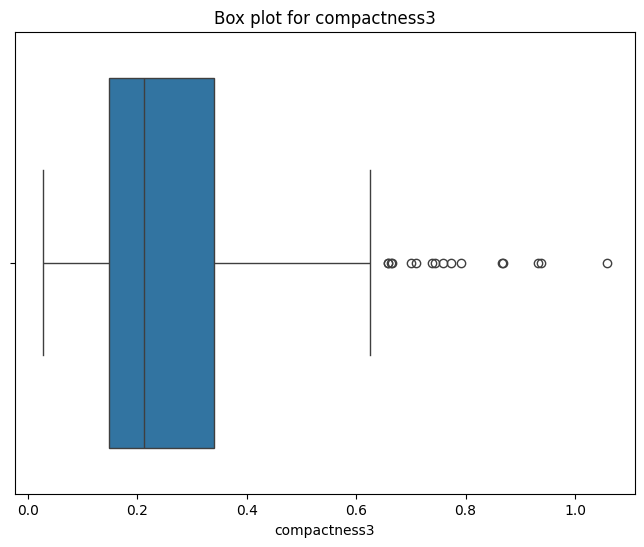

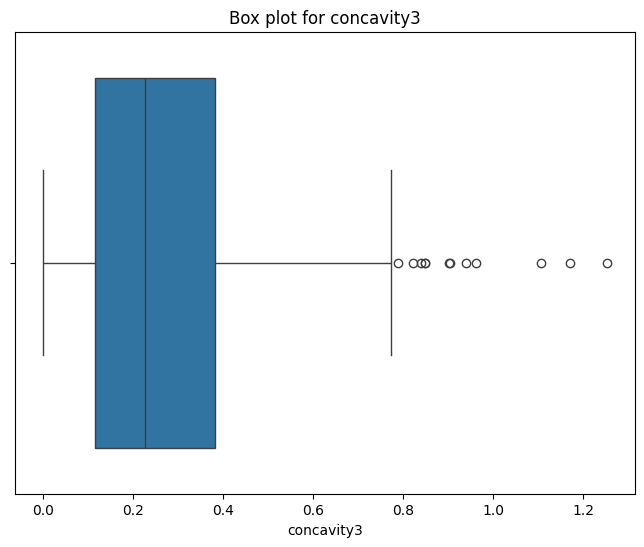

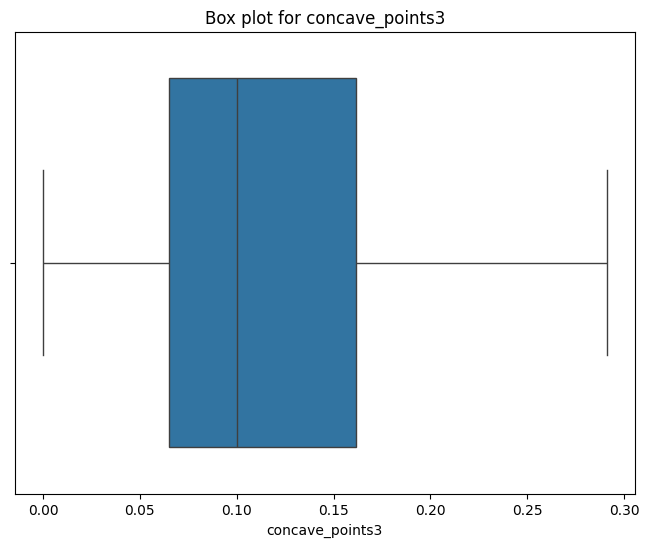

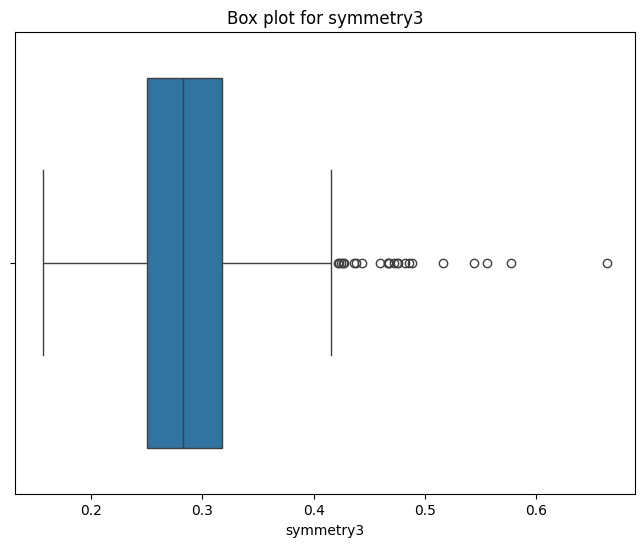

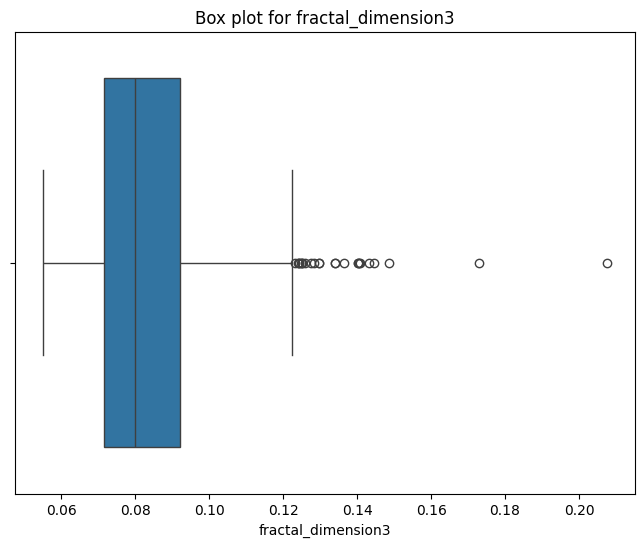

In [24]:
print(len(X.columns))
draw_boxplot(X)

In [25]:
import numpy as np

# Create a copy of the Dataframe
X_clean = X.copy()

for col in X.columns:
    # Calculate Q1, Q3 and IQR for the current feature
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers from the Dataframe
    X_clean[col].replace(list(X_clean[X_clean[col] > upper_bound][col]), upper_bound, inplace=True)
    X_clean[col].replace(list(X_clean[X_clean[col] < lower_bound][col]), lower_bound, inplace=True)

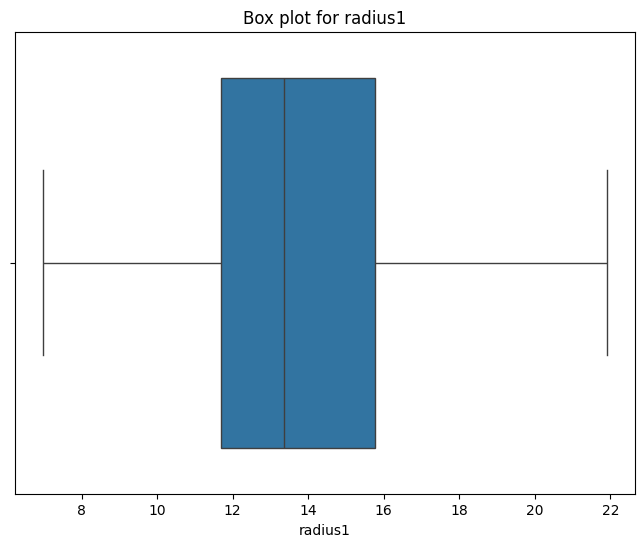

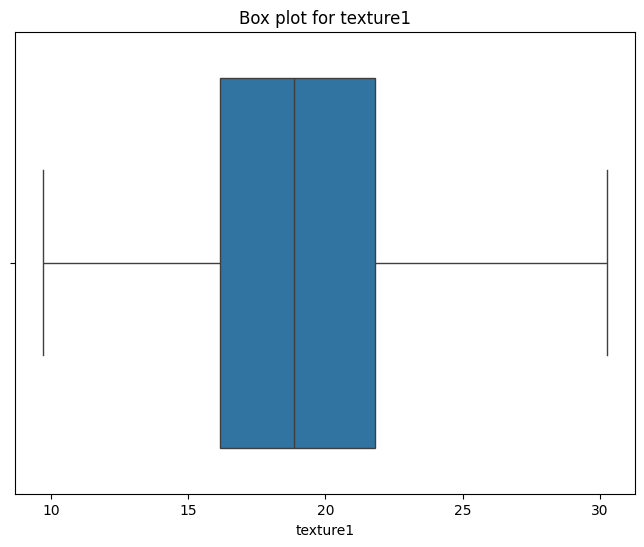

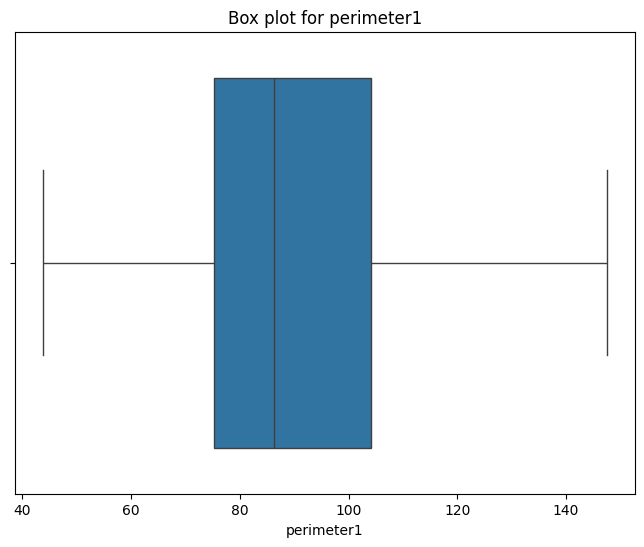

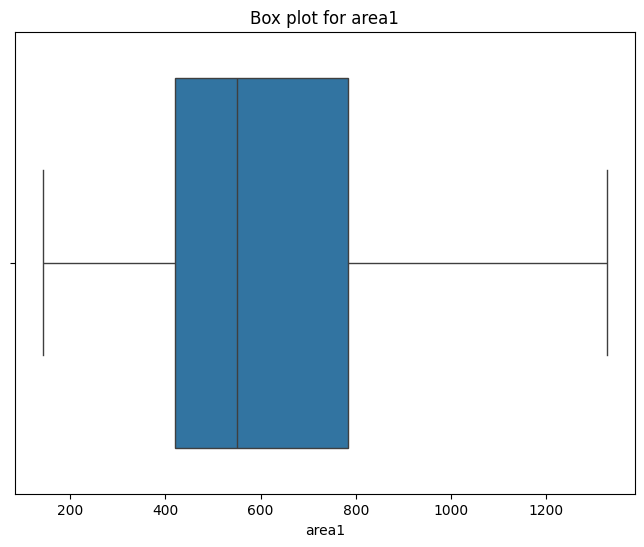

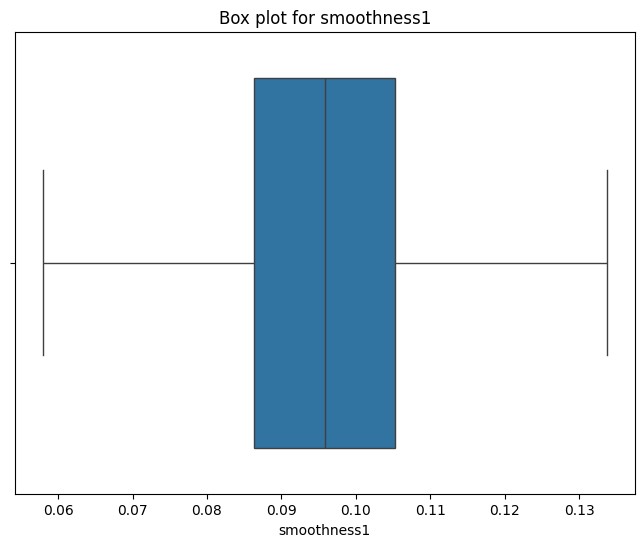

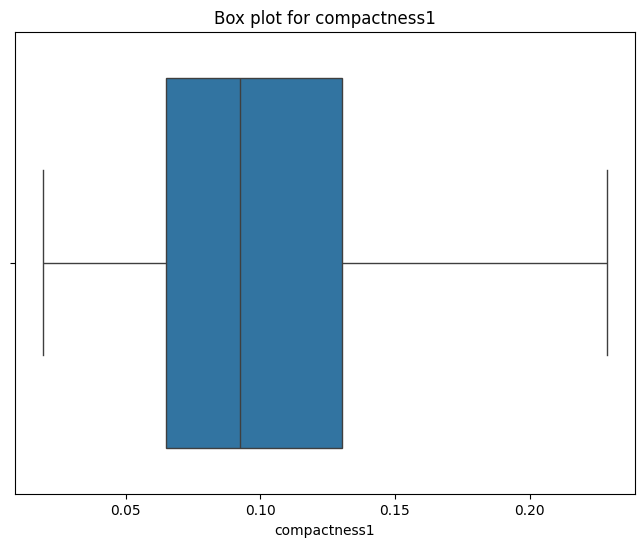

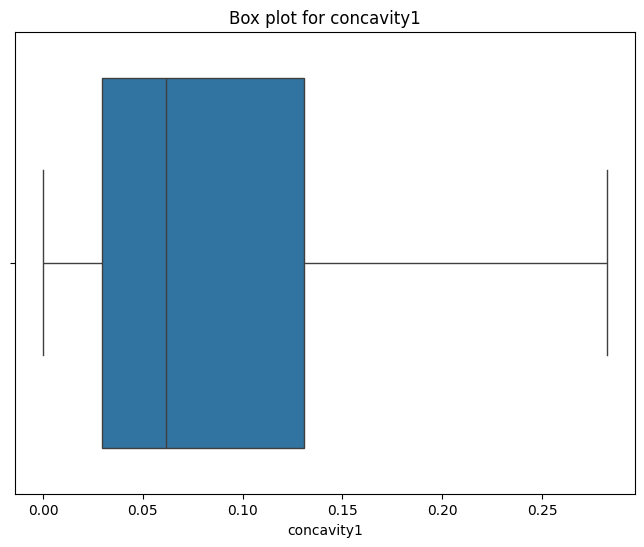

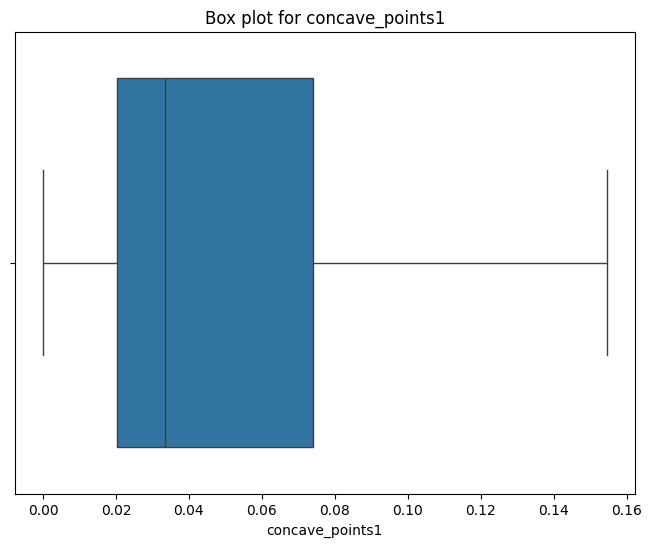

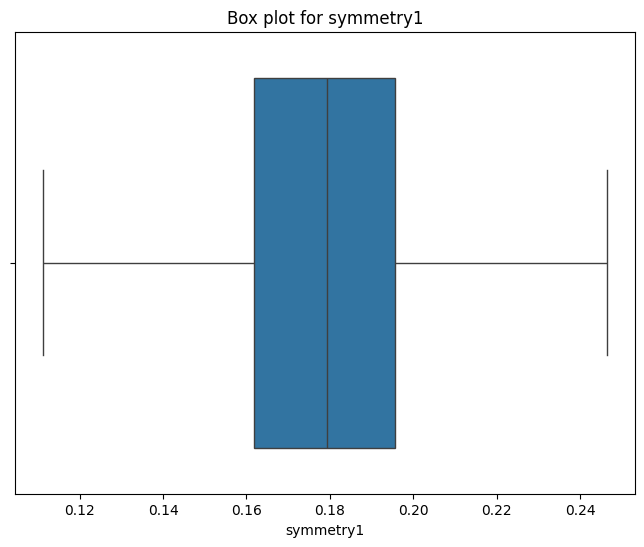

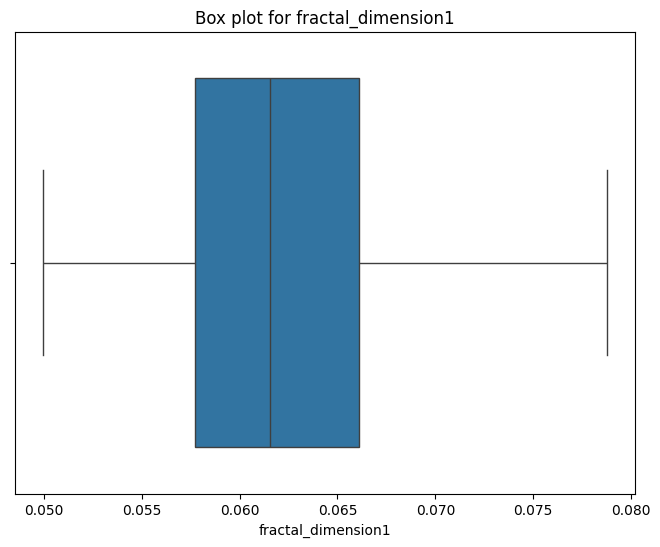

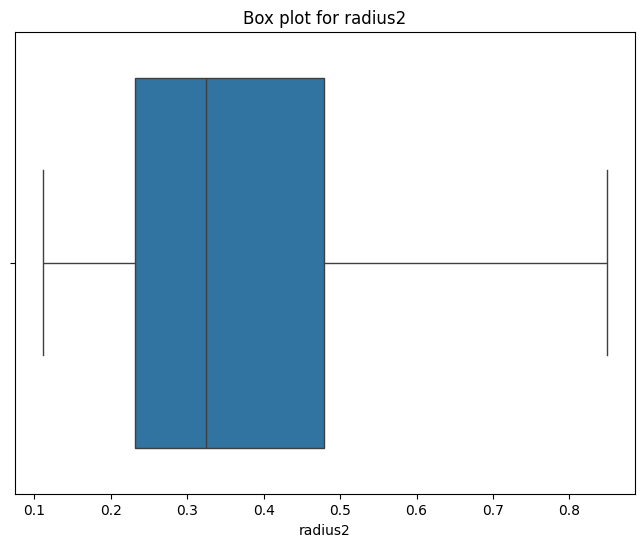

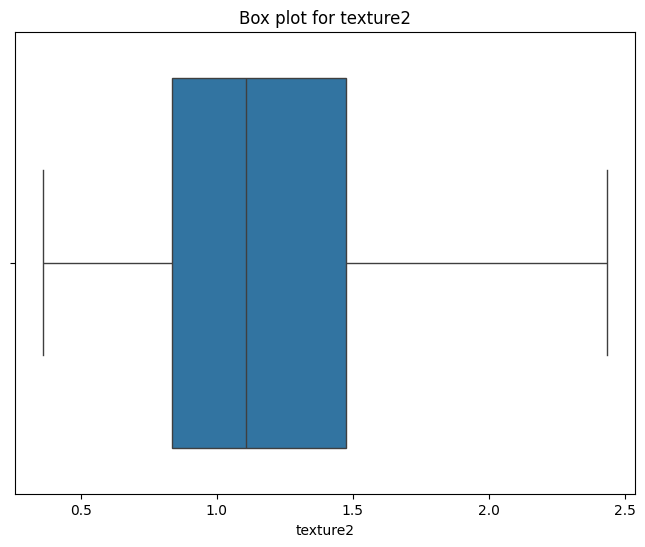

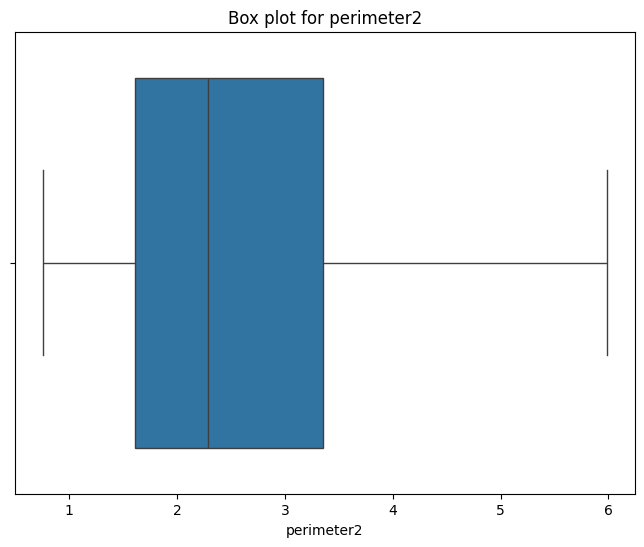

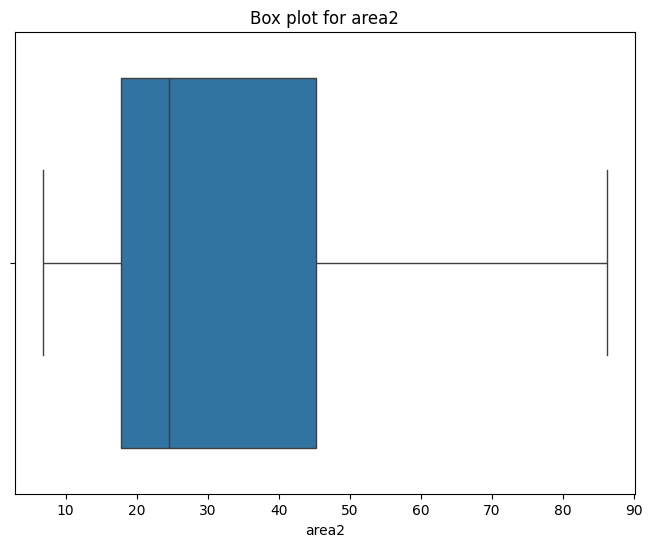

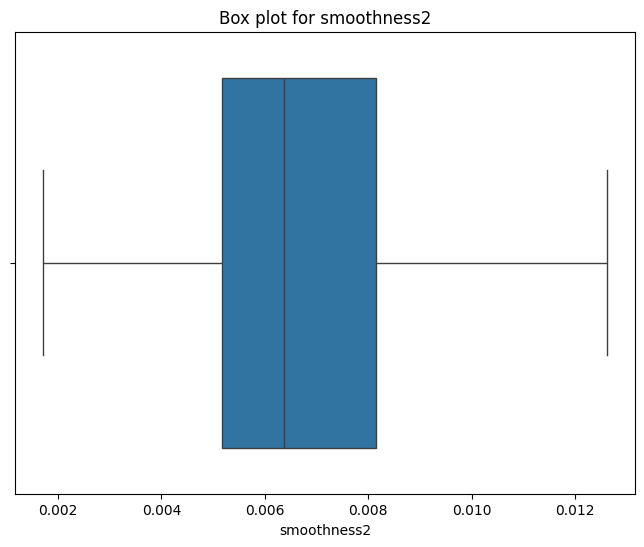

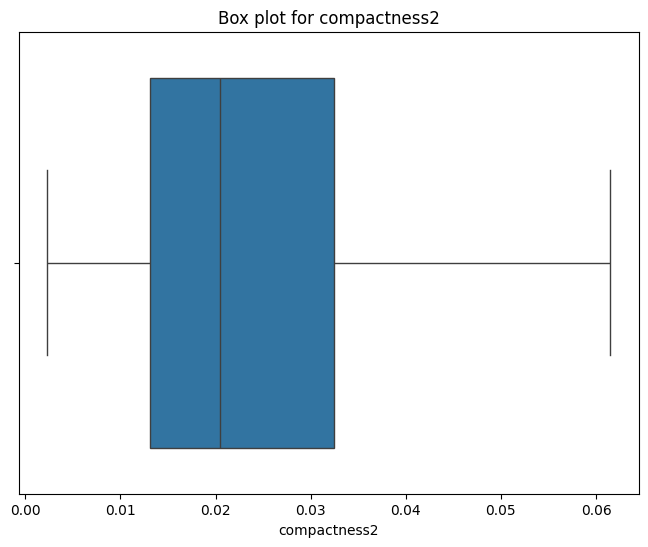

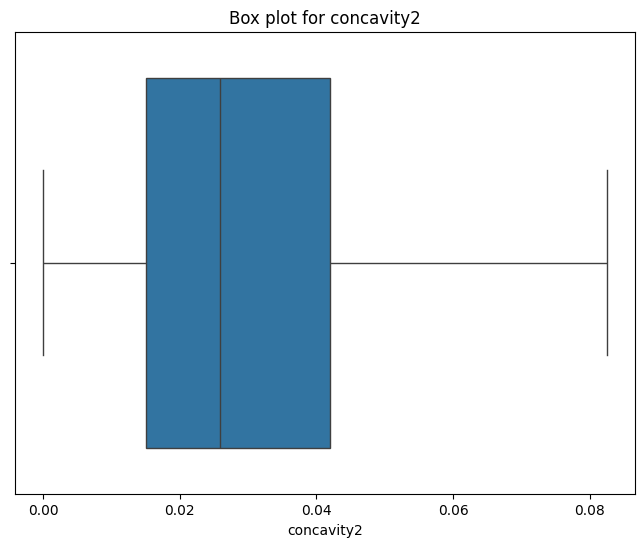

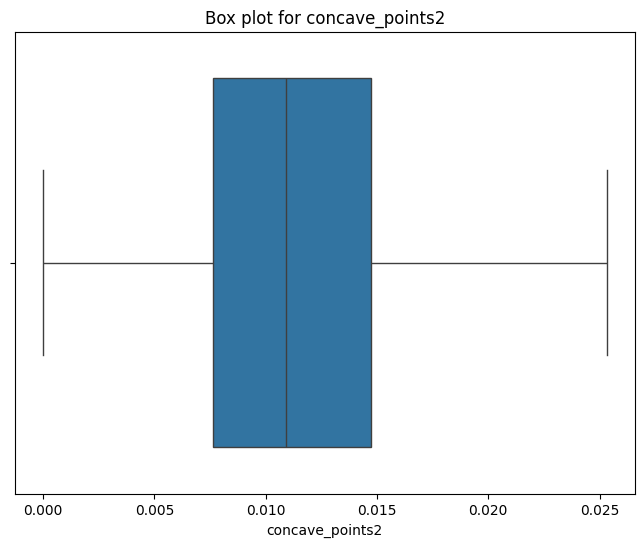

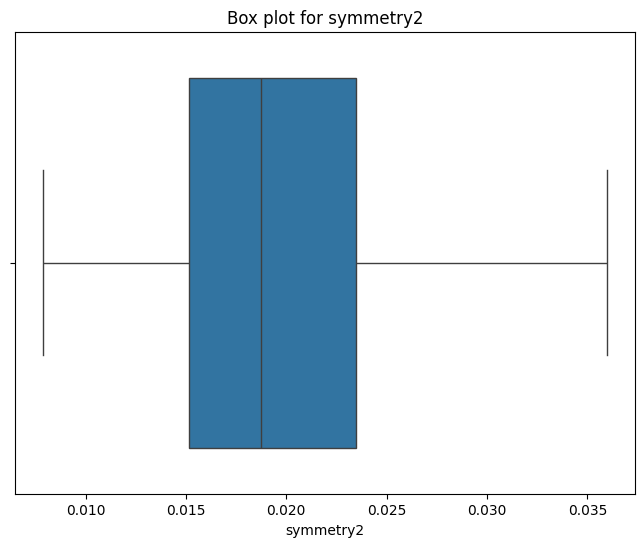

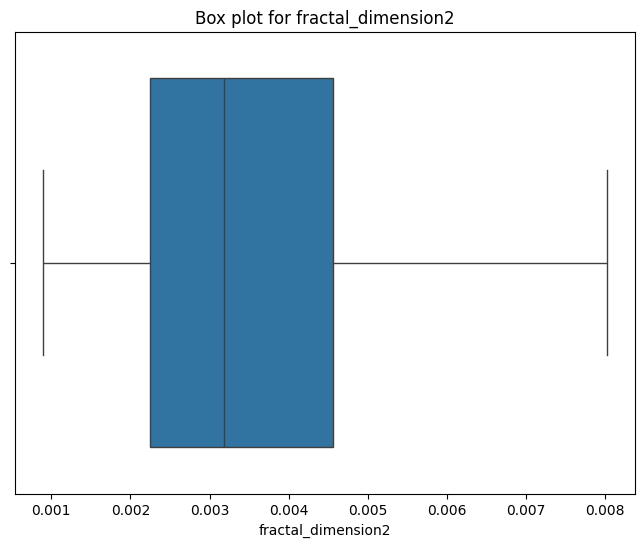

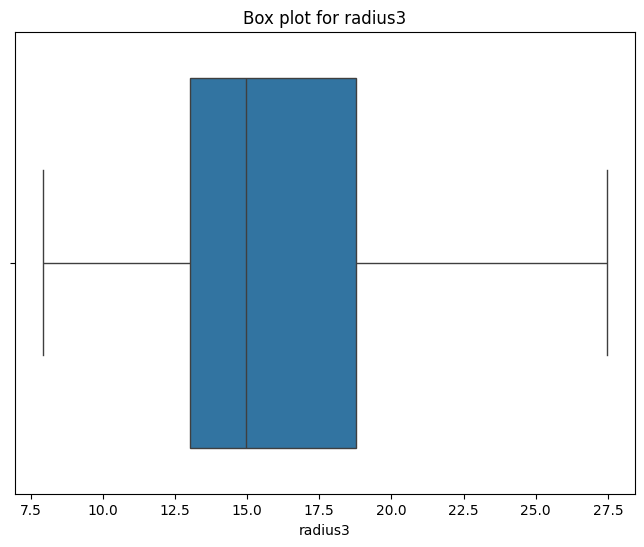

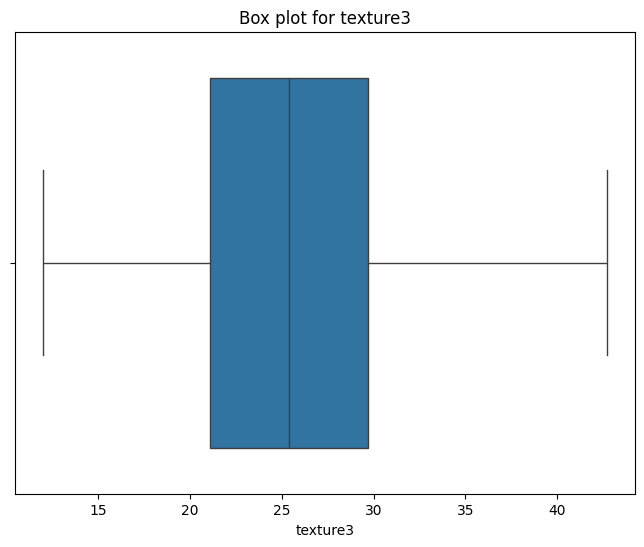

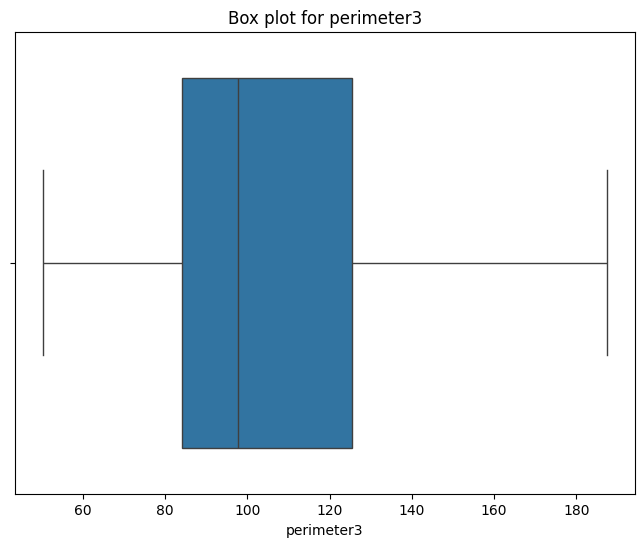

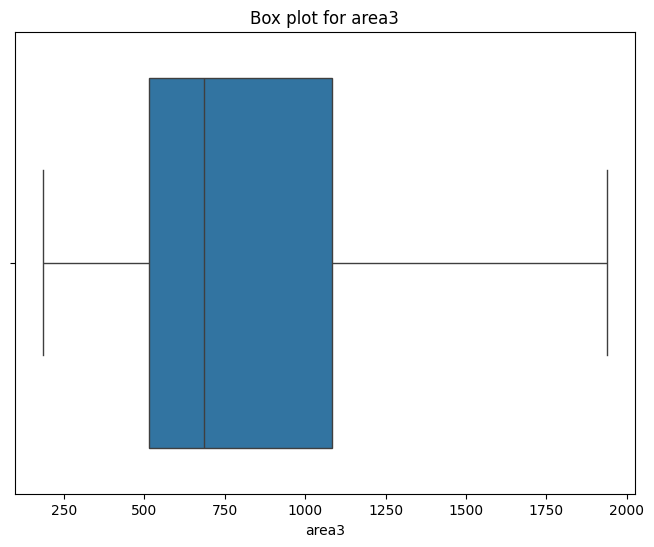

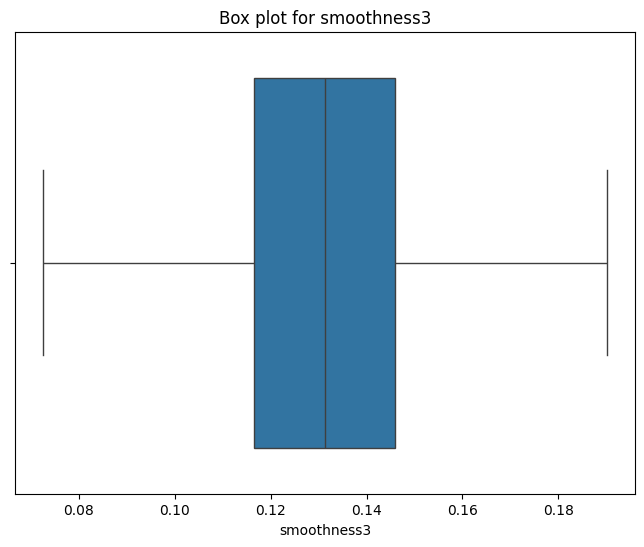

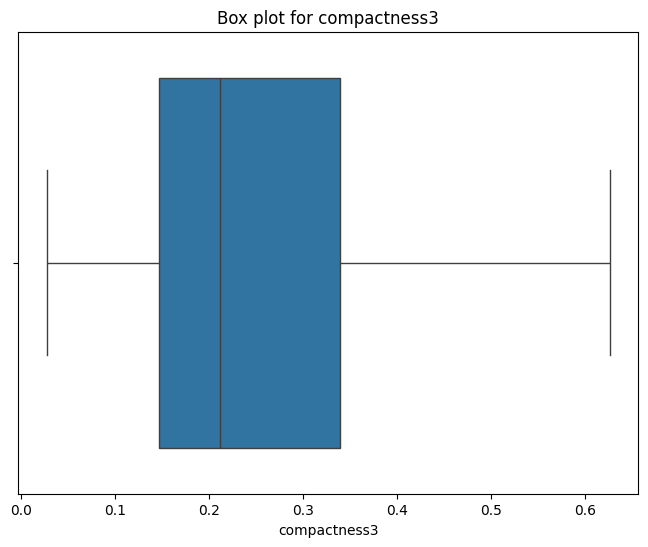

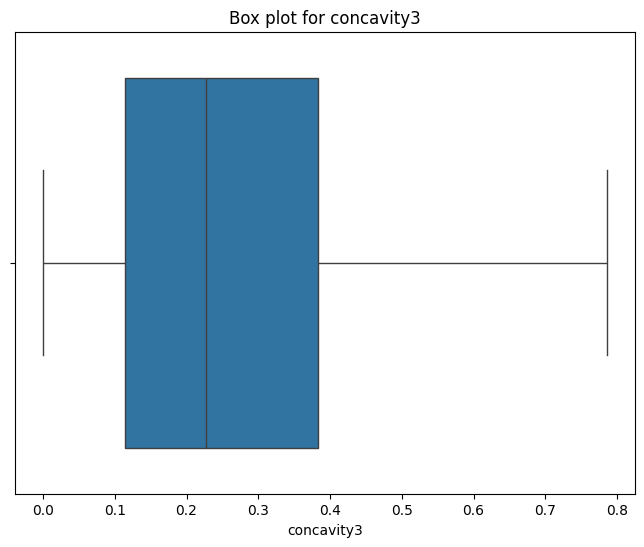

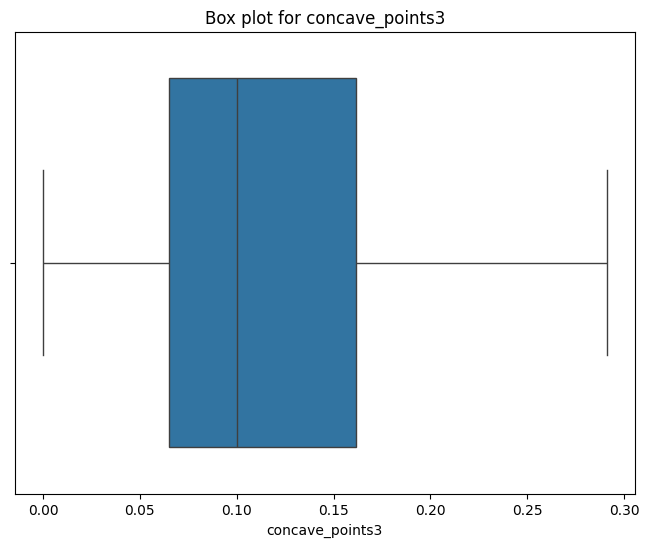

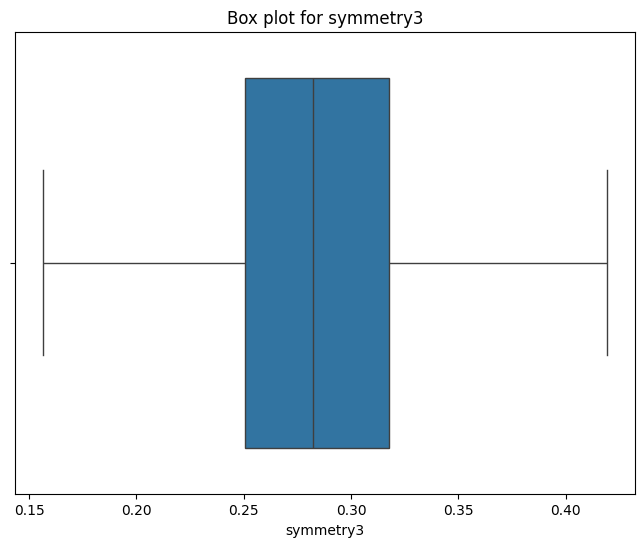

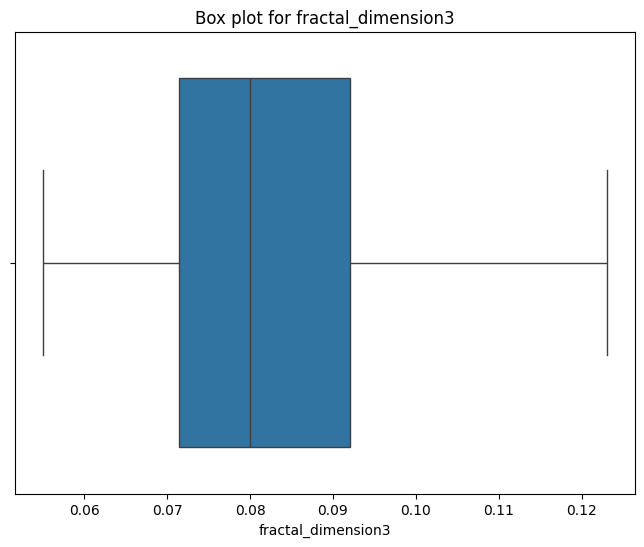

In [26]:
draw_boxplot(X_clean)

In [27]:
from scipy.stats import spearmanr

# Iterate over each feature column and calculate Pearson's correlation coefficient with the target
correlations = {}
for feature_column in X_clean.columns:
    correlation, _ = spearmanr(X_clean[feature_column], y['Diagnosis'])
    correlations[feature_column] = correlation

# Display the correlations
for feature, correlation in correlations.items():
    print("Correlation between {} and Diagnosis: {:.4f}".format(feature, correlation))

Correlation between radius1 and Diagnosis: 0.7328
Correlation between texture1 and Diagnosis: 0.4620
Correlation between perimeter1 and Diagnosis: 0.7485
Correlation between area1 and Diagnosis: 0.7342
Correlation between smoothness1 and Diagnosis: 0.3719
Correlation between compactness1 and Diagnosis: 0.6093
Correlation between concavity1 and Diagnosis: 0.7332
Correlation between concave_points1 and Diagnosis: 0.7779
Correlation between symmetry1 and Diagnosis: 0.3324
Correlation between fractal_dimension1 and Diagnosis: -0.0257
Correlation between radius2 and Diagnosis: 0.6166
Correlation between texture2 and Diagnosis: 0.0195
Correlation between perimeter2 and Diagnosis: 0.6305
Correlation between area2 and Diagnosis: 0.7147
Correlation between smoothness2 and Diagnosis: -0.0526
Correlation between compactness2 and Diagnosis: 0.3808
Correlation between concavity2 and Diagnosis: 0.4706
Correlation between concave_points2 and Diagnosis: 0.4891
Correlation between symmetry2 and Diagnos

In [61]:
# Selecting features with a correlation coefficient with absolute value greater than 0.5
selected_columns = [feature for feature, correlation in correlations.items() if abs(correlation) > 0.5]
print("Selected columns with correlation coefficient > 0.5:", selected_columns)
print(len(selected_columns))

Selected columns with correlation coefficient > 0.7: ['radius1', 'perimeter1', 'area1', 'compactness1', 'concavity1', 'concave_points1', 'radius2', 'perimeter2', 'area2', 'radius3', 'perimeter3', 'area3', 'compactness3', 'concavity3', 'concave_points3']
15


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

X_train_selected = X_clean[selected_columns]
X_train, X_test, y_train, y_test = train_test_split(X_train_selected, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.head()

,radius1,perimeter1,area1,compactness1,concavity1,concave_points1,radius2,perimeter2,area2,radius3,perimeter3,area3,compactness3,concavity3,concave_points3
0,1.830835,2.267375,1.997116,2.593918,2.642544,2.817882,2.241994,2.319289,2.099925,1.559841,1.980520,1.624940,2.566014,2.507109,2.049399
1,0.590387,0.623164,0.508670,0.729929,0.459473,0.591302,-0.235813,-0.049510,-0.071391,0.556138,0.545186,0.459474,1.390705,1.135137,1.255850
2,-0.118013,-0.137337,-0.191737,-0.525087,-0.590358,-0.618264,-1.189542,-1.128516,-0.970603,-0.362653,-0.276698,-0.410937,0.432890,-0.066659,-0.140014
3,1.005862,1.000595,1.018655,0.271671,1.103574,0.473786,0.696604,0.754095,0.964835,0.405909,0.423495,0.356205,-0.481007,0.051154,-0.072253
4,0.174912,0.188034,0.043159,0.664754,0.180003,0.597389,0.608933,0.787285,0.317911,0.029248,0.080263,-0.101973,0.422433,-0.049038,0.376471


In [63]:
print(X_train.nunique())

radius1            326
perimeter1         367
area1              364
compactness1       373
concavity1         363
concave_points1    374
radius2            356
perimeter2         351
area2              332
radius3            324
perimeter3         363
area3              365
compactness3       368
concavity3         371
concave_points3    354
dtype: int64


Random Forest: 95.32%
Accuracy with cross-validation: 95.26%
Precision with cross-validation: 0.95
F1 Score with cross-validation: 0.92
Recall score: 0.89


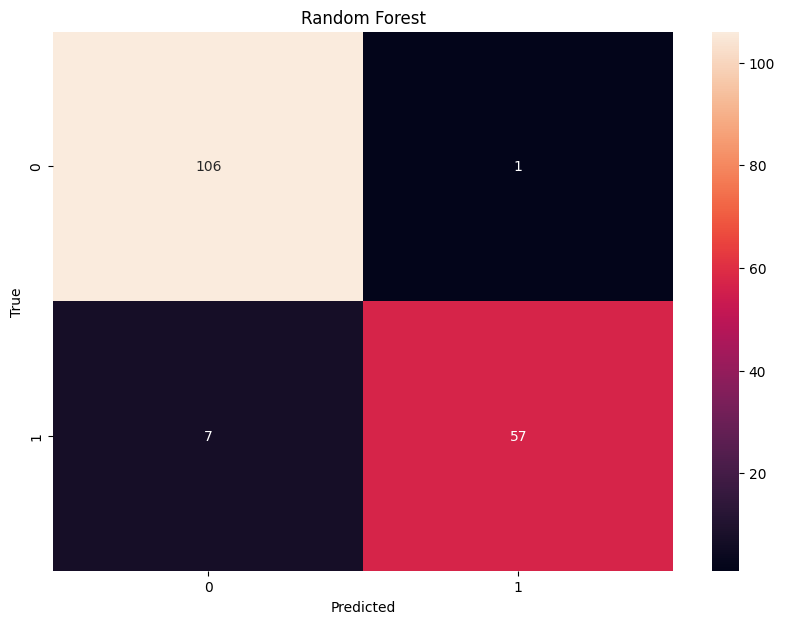

Logistic Regression: 96.49%


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Accuracy with cross-validation: 94.56%
Precision with cross-validation: 0.94
F1 Score with cross-validation: 0.91
Recall score: 0.91


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

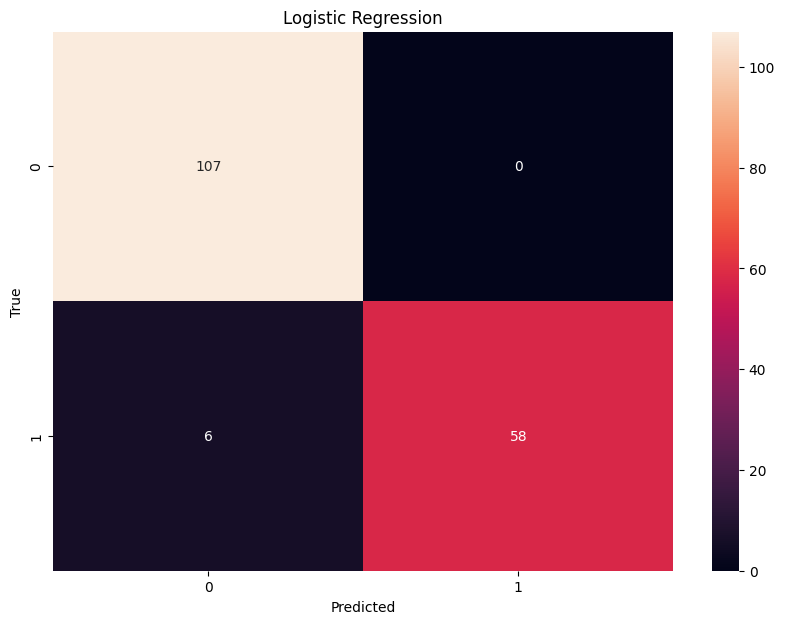

K-Nearest Neighbors: 92.98%
Accuracy with cross-validation: 92.97%
Precision with cross-validation: 0.93
F1 Score with cross-validation: 0.91
Recall score: 0.83


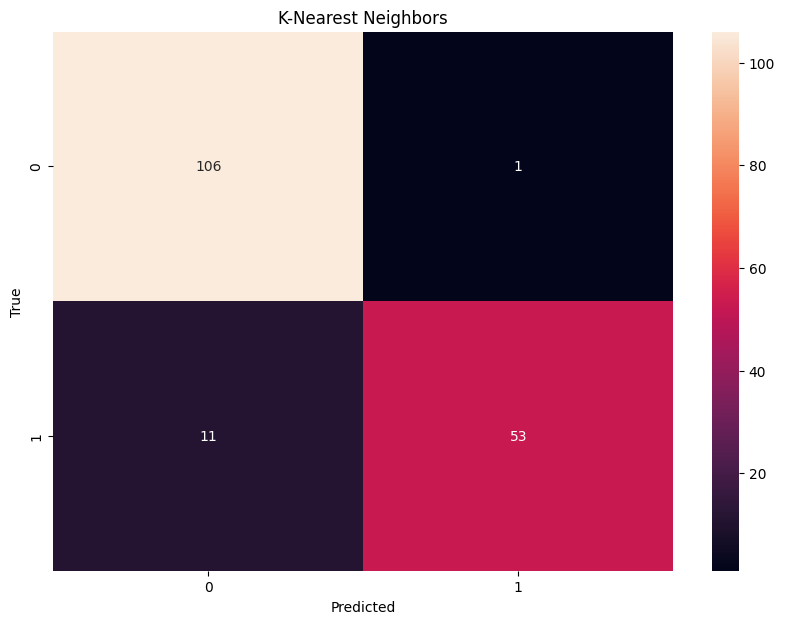

XGBoost: 95.91%
Accuracy with cross-validation: 96.66%
Precision with cross-validation: 0.97
F1 Score with cross-validation: 0.93
Recall score: 0.91


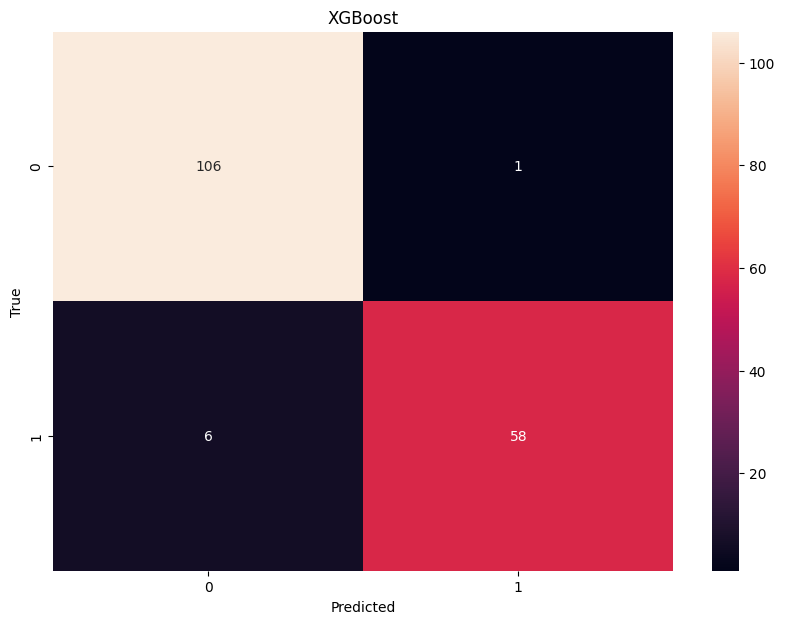

SVM: 90.06%
Accuracy with cross-validation: 92.44%
Precision with cross-validation: 0.97
F1 Score with cross-validation: 0.88
Recall score: 0.73


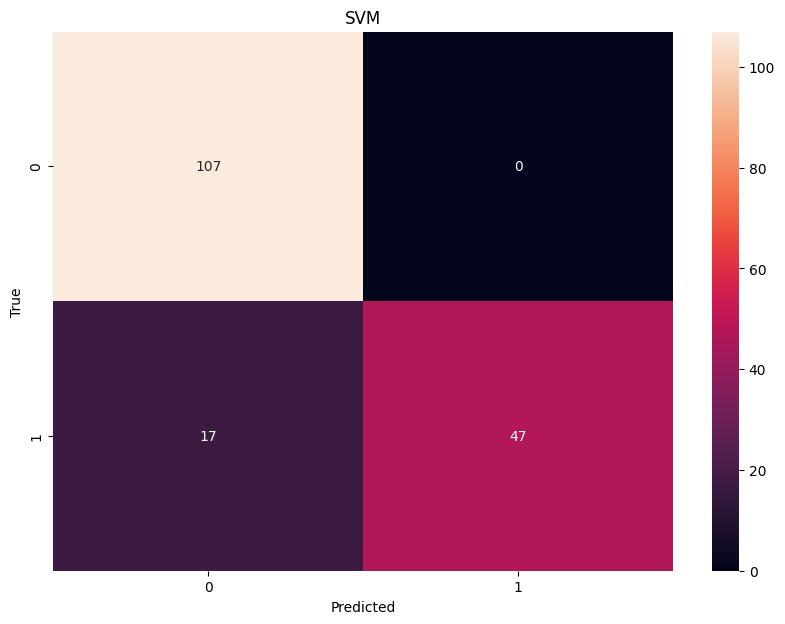

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn.model_selection import cross_val_score, KFold

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

num_splits = 5
kFold = KFold(num_splits, shuffle=True)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print("{}: {:.2f}%".format(name, accuracy * 100))

    scores = cross_val_score(model, X_clean, y, cv=kFold, scoring='accuracy')
    precision_scores = cross_val_score(model, X_clean, y, cv=kFold, scoring='precision')
    f1_scores = cross_val_score(model, X_clean, y, cv=kFold, scoring='f1')
    #recall = recall_score(model, X_clean, y, cv=KFold, scoring='recall')
    print("Accuracy with cross-validation: {:.2f}%".format(np.mean(scores) * 100))
    print("Precision with cross-validation: {:.2f}".format(np.mean(precision_scores)))
    print("F1 Score with cross-validation: {:.2f}".format(np.mean(f1_scores)))
    print("Recall score: {:.2f}".format(recall) )

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(name)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()



In [66]:
from sklearn.model_selection import cross_val_score, KFold
num_splits = 5
kFold = KFold(num_splits, shuffle=True)

for name, model in models.items():
    scores = cross_val_score(model, X_clean, y, cv=kFold, scoring='accuracy')
    precision_scores = cross_val_score(model, X_clean, y, cv=kFold, scoring='precision')
    f1_scores = cross_val_score(model, X_clean, y, cv=kFold, scoring='f1')

    print("\nModel: {}".format(name))
    print("Accuracy with cross-validation: {:.2f}%".format(np.mean(scores) * 100))
    print("Precision with cross-validation: {:.2f}".format(np.mean(precision_scores)))
    print("F1 Score with cross-validation: {:.2f}".format(np.mean(f1_scores)))


Model: Random Forest
Accuracy with cross-validation: 95.43%
Precision with cross-validation: 0.96
F1 Score with cross-validation: 0.94


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m


Model: Logistic Regression
Accuracy with cross-validation: 94.20%
Precision with cross-validation: 0.93
F1 Score with cross-validation: 0.93

Model: K-Nearest Neighbors
Accuracy with cross-validation: 93.33%
Precision with cross-validation: 0.94
F1 Score with cross-validation: 0.90

Model: XGBoost
Accuracy with cross-validation: 96.13%
Precision with cross-validation: 0.96
F1 Score with cross-validation: 0.95

Model: SVM
Accuracy with cross-validation: 91.74%
Precision with cross-validation: 0.96
F1 Score with cross-validation: 0.87
